In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

sys.path.append("../src")
from game_graph import edges
from k_median_optimization import *

In [25]:
g = nx.Graph()
for i, cities in enumerate(edges):
    g.add_edge(cities[0], cities[1])

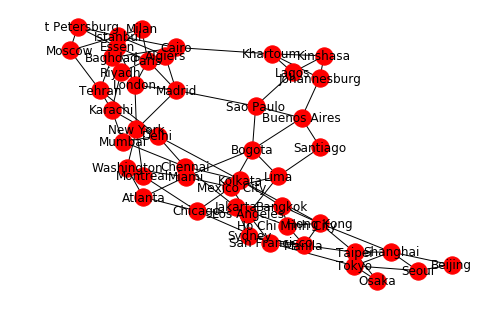

In [26]:
nx.draw(g, with_labels=True)
plt.show()

In [27]:
sorted(nx.betweenness_centrality(g).items(), key=lambda kv: kv[1], reverse=True)[:5]

[('San Francisco', 0.17090950472079058),
 ('Delhi', 0.16810639766236435),
 ('Los Angeles', 0.1573693523045975),
 ('Chicago', 0.15158399776808656),
 ('Madrid', 0.13389314714476594)]

In [32]:
tmp = optimize_station_placement(g, max_facilities=1, require_atlanta=True)

In [33]:
tmp

station_placement(selections=('Atlanta',), objective_value=185.0)

In [34]:
type(g)

networkx.classes.graph.Graph